# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [105]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import ggplot2

import pivottabler

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'ggplot2'

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [5]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

## Summary statistics

In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's start with some summary statistics. 



In [78]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
# 👉 Select the continuous variables only and get summary statistics
# including, mean, median, min, max, and stdev for every column
mtcars %>%
  select(all_of(continuous_variables)) %>%
  summarize_all(list(
    mean = mean,
    median = median,
    min = min,
    max = max,
    stdev = sd
  )) %>%
  pivot_longer(
    cols = everything(),
    names_to = c("variable", "stat"),
    names_sep = "_"
  ) %>%
  pivot_wider(
    names_from = stat,
    values_from = value
  ) %>%
  print(n = 30)

# A tibble: 6 × 6
  variable   mean median   min    max   stdev
  <chr>     <dbl>  <dbl> <dbl>  <dbl>   <dbl>
1 mpg       20.1   19.2  10.4   33.9    6.03 
2 disp     231.   196.   71.1  472    124.   
3 hp       147.   123    52    335     68.6  
4 drat       3.60   3.70  2.76   4.93   0.535
5 wt         3.22   3.32  1.51   5.42   0.978
6 qsec      17.8   17.7  14.5   22.9    1.79 


In [106]:
%%R

discrete_variables <- c('vs', 'am', 'gear', 'carb')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?
mtcars_long <- mtcars %>%
    select(name,discrete_variables) %>%
    pivot_longer(
        cols=!name, names_to = 'variable', values_to = 'value') %>%
        group_by(variable, value) %>%
        count()
        
mtcars_long

# A tibble: 13 × 3
# Groups:   variable, value [13]
   variable value     n
   <chr>    <dbl> <int>
 1 am           0    19
 2 am           1    13
 3 carb         1     7
 4 carb         2    10
 5 carb         3     3
 6 carb         4    10
 7 carb         6     1
 8 carb         8     1
 9 gear         3    15
10 gear         4    12
11 gear         5     5
12 vs           0    18
13 vs           1    14


## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. You may have to google to learn what that column is. The chart should show the min, max, and median of the variable. For example, if you do a histogram, you might put a vertical line through the median. If you do a dot-plot, annotate the median some other way. (boxplots show it by default).


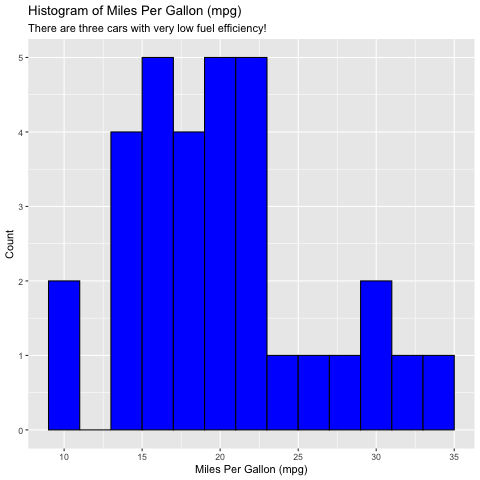

In [113]:
%%R 

# 👉 chart for mpg
ggplot(mtcars, aes(x = mpg)) +
  geom_histogram(binwidth = 2, fill = "blue", color = "black") +
  labs(title = "Histogram of Miles Per Gallon (mpg)", subtitle = "There are three cars with very low fuel efficiency!", x = "Miles Per Gallon (mpg)", y = "Count")

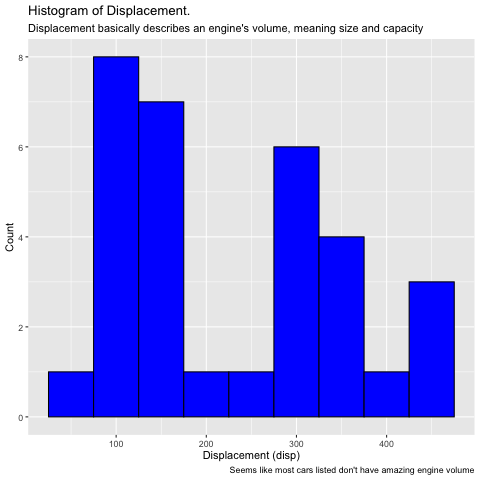

In [116]:
%%R 

# 👉 chart for disp
ggplot(mtcars, aes(x = disp)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") +
  labs(title = "Histogram of Displacement.", subtitle = "Displacement basically describes an engine's volume, meaning size and capacity", x = "Displacement (disp)", y = "Count", caption = "Seems like most cars listed don't have amazing engine volume")

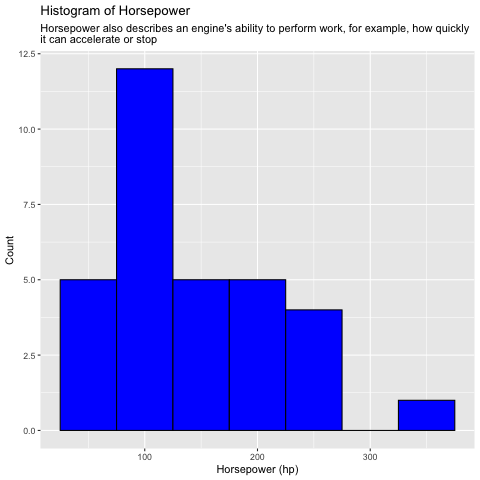

In [121]:
%%R
# 👉 chart for hp
ggplot(mtcars, aes(x = hp)) +
  geom_histogram(binwidth = 50, fill = "blue", color = "black") +
  labs(title = "Histogram of Horsepower", 
       subtitle = "Horsepower also describes an engine's ability to perform work, for example, how quickly
it can accelerate or stop", 
       x = "Horsepower (hp)", 
       y = "Count")


In [ ]:
%%R 

# 👉 chart for mpg


In [ ]:
%%R 

# 👉 chart for drat


In [ ]:
%%R 

# 👉 chart for wt


In [ ]:
%%R 

# 👉 chart for qsec


Bonus: Write the ggplot code to reproduce the chart below


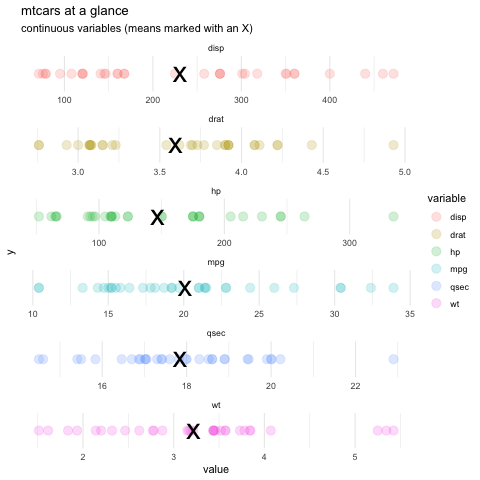

### Discrete Variables

Take the `mtcars` dataframe, `select` only the discrete variables, the use `pivot_longer` to pivot it from wide to long. Finally, use ggplot to make a column chart from the long dataframe that is faceted by the discrete variable. So you should end up with one chart, with subplots for each facet, like this:

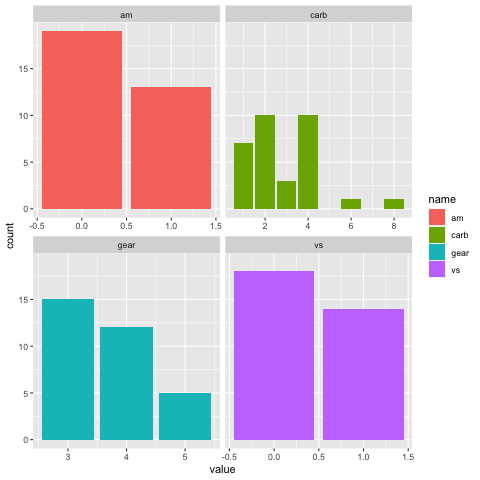

In [33]:
%%R 

discrete_variables <- c('vs', 'am', 'gear', 'carb')

# 👉 Write code to reproduce the chart above in this cell and give the chart a title
# 👉 write four sentences below, one per subplot (thsee are just obesrvations)

👉 Run the cell below, observe the chart it creates. Then comment the code to demonstrate you understand what it does. Replace every `#add comment here` with a comment explaining what that part of the code does. If you're not sure, talk to ChatGPT about it.

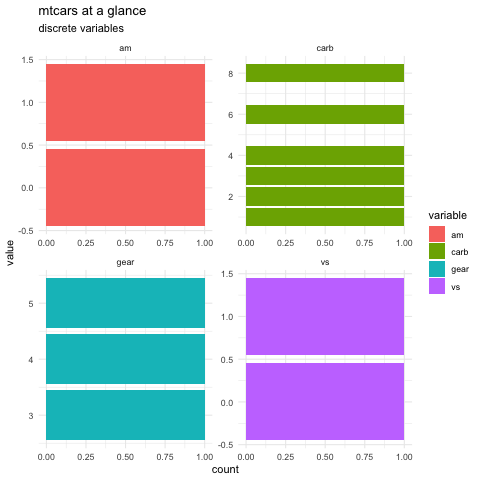

In [102]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

## Visual Choices Questions

👉 What is a discrete variable vs a continuous variable?

👉 Why did I chose a bar chart for the discrete variables and distributions for the continuous variables?

In [ ]:
# answer here

👉 What can you tell me about these cars after looking at the charts above?

In [ ]:
# answer here

👉 What further questions about this data do you have now? 

In [ ]:
# answer here